In [3]:
# imports
from Bio.SeqIO.FastaIO import SimpleFastaParser
import pandas as pd
import numpy as np
import itertools as it
import matplotlib.pyplot as plt
import multiprocessing
import time
plt.rcParams['figure.dpi'] = 150

In [4]:
with open('influenza.fna') as fasta_file: 
    cgi_titles = []
    cgi_sequences = []
    for title, sequence in SimpleFastaParser(fasta_file):
        cgi_titles.append(title)
        cgi_sequences.append(sequence)
influenza_na = pd.DataFrame(list(zip(cgi_titles, cgi_sequences)), columns=['titles','sequences'])
uniflna = influenza_na.drop_duplicates('sequences')
uniflna_HA = uniflna.loc[uniflna.iloc[:,0].str.contains(r'\(HA\) | hemagglutinin | (segment 4)')]

/home/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  if __name__ == '__main__':


In [5]:
# correct size=(102414, 2)
uniflna_HA.shape

(102414, 2)

In [6]:
# character kgram function, out is set
def charkgram(text, k):
    results=set()
    for i in range(len(text)-k+1):
        if text[i:i+k] not in results:
            results.add(text[i:i+k])
    return(results)

# Jaccard Distance
def JacDist(a,b):
    top = len(a & b)
    bottom = len(a | b)
    return(1-top/bottom)

In [7]:
np.random.seed(12478)
uniflna_HA_sub1 = uniflna_HA.sample(n=100)
idl=list(it.combinations(list(uniflna_HA_sub1.index),2))

In [8]:
len(idl)

4950

In [9]:
# k=5
JDresults5=[]
start=time.time()
for i in idl:
    JDresults5.append(JacDist(charkgram(uniflna_HA_sub1.loc[[i[0]]].sequences.values[0],5),charkgram(uniflna_HA_sub1.loc[[i[1]]].sequences.values[0],5)))
print("total time:", time.time()-start)

total time: 10.238529920578003


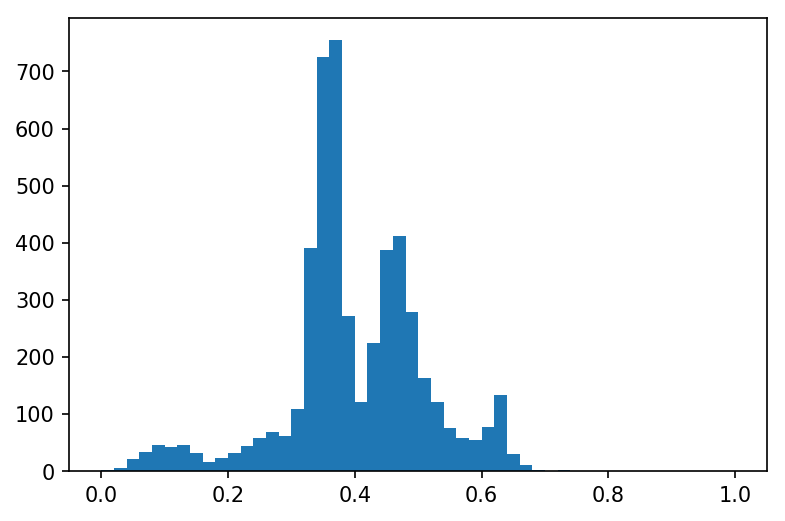

In [10]:
plt.hist(JDresults5, 50, range=(0,1));

In [ ]:
uniflna_HA_subtest = uniflna_HA.sample(n=10)

In [ ]:
def JDpwl(file):
    idl=list(it.combinations(list(file.index),2))
    print(JacDist(charkgram(file.loc[[i[0]]].sequences.values[0],5),charkgram(file.loc[[i[1]]].sequences.values[0],5)))
    #print(idl)

In [ ]:
# JDpwl(uniflna_HA_subtest)

In [ ]:
uniflna_HA_sub1.loc[[i[0]]].sequences.values[0]

In [ ]:
uniflna_HA_subtest = uniflna_HA.sample(n=10)

In [ ]:
list(uniflna_HA_subtest.sequences)

In [ ]:
def multi_charkgram(flist, k):
    results = []
    for i in range(len(flist)):
        results.append(charkgram(flist[i], k))
    return(results)

In [ ]:
multi_charkgram(list(uniflna_HA_subtest.sequences), 5)

In [ ]:
idl=list(it.combinations(list(uniflna_HA_sub1.index),2))

In [ ]:
idl[0]

In [ ]:
idl[0][0]

In [ ]:
idl[0][1]

In [ ]:
uniflna_HA_sub1.loc[[idl[0][0]]].sequences.values[0]

In [ ]:
uniflna_HA_sub1.loc[[idl[0][1]]].sequences.values[0]

In [ ]:
def JDm(id_tup, file_name):
    k = 5
    a = charkgram(file_name.loc[[id_tup[0]]].sequences.values[0], k)
    b = charkgram(file_name.loc[[id_tup[1]]].sequences.values[0], k)
    return(JacDist(a,b))
    
    
    

In [ ]:
JDm(idl[0],uniflna_HA_sub1)

In [13]:
len(uniflna_HA_sub1)

100

In [11]:
def JDm(id_tup, file_name):
    k = 5
    a = charkgram(file_name.loc[[id_tup[0]]].sequences.values[0], k)
    b = charkgram(file_name.loc[[id_tup[1]]].sequences.values[0], k)
    return(JacDist(a,b))

current_file = uniflna_HA_sub1
idl=list(it.combinations(list(current_file.index),2))
print(len(idl))

if __name__ == "__main__":
    t1=time.time()
    p = multiprocessing.Pool(processes=30)
    result = [p.apply_async(JDm, args=(x, current_file)) for x in idl]
    #print(result)
    #p.close()
    #p.join()
    output = [p.get() for p in result]
    
    print("Pool took:",time.time()-t1)
    
    JDresults5=[]
    start=time.time()
    for i in idl:
        JDresults5.append(JacDist(charkgram(current_file.loc[[i[0]]].sequences.values[0],5),charkgram(current_file.loc[[i[1]]].sequences.values[0],5)))
    print("Serial took:", time.time()-start)

4950
Pool took: 3.4170477390289307
Serial took: 10.84888505935669


In [15]:
# map version
current_file = uniflna_HA_sub1

def JDmfi(id_tup):
    k = 5
    a = charkgram(current_file.loc[[id_tup[0]]].sequences.values[0], k)
    b = charkgram(current_file.loc[[id_tup[1]]].sequences.values[0], k)
    return(JacDist(a,b))


idl=list(it.combinations(list(current_file.index),2))
print(len(idl))

if __name__ == "__main__":
    t1=time.time()
    p = multiprocessing.Pool(processes=30)
    result = p.map(JDmfi, idl)
    #print(result)
    p.close()
    p.join()
    
    print("Pool took:",time.time()-t1)
    
    JDresults5=[]
    start=time.time()
    for i in idl:
        JDresults5.append(JacDist(charkgram(current_file.loc[[i[0]]].sequences.values[0],5),charkgram(current_file.loc[[i[1]]].sequences.values[0],5)))
    print("Serial took:", time.time()-start)

4950
Pool took: 2.141103982925415
Serial took: 10.39531660079956


In [16]:
np.mean(result)

0.397926671723273

In [17]:
len(result)

4950

In [20]:
result[0:12]

[0.43999999999999995,
 0.43137254901960786,
 0.42368742368742374,
 0.4504830917874396,
 0.4496969696969697,
 0.4191542288557214,
 0.5094850948509485,
 0.424812030075188,
 0.4627403846153846,
 0.44061757719714967,
 0.4448441247002398,
 0.4312039312039312]

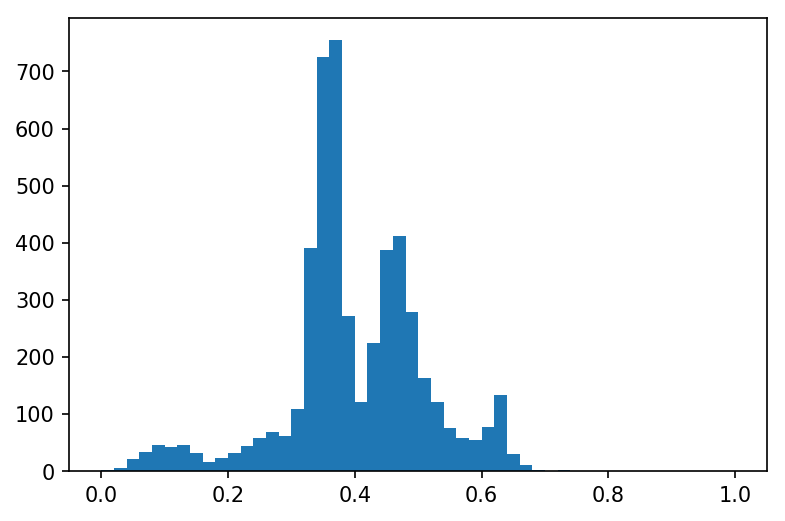

In [21]:
plt.hist(result, 50, range=(0,1));

In [ ]:
uniflna_HA_sub2 = uniflna_HA.sample(n=50)

In [ ]:
def JDm(id_tup, file_name):
    k = 5
    a = charkgram(file_name.loc[[id_tup[0]]].sequences.values[0], k)
    b = charkgram(file_name.loc[[id_tup[1]]].sequences.values[0], k)
    return(JacDist(a,b))

current_file = uniflna_HA_sub2
idl=list(it.combinations(list(current_file.index),2))
print("number of comparisons", len(idl))

if __name__ == "__main__":
    t1=time.time()
    p = multiprocessing.Pool(processes=30)
    result = [p.map(JDm, args=(x, current_file)) for x in idl]
    #print(result)
    p.close()
    p.join()
    output = [p.get() for p in result]
    
    print("Pool took:",time.time()-t1)

In [22]:
uniflna_HA_sub3 = uniflna_HA.sample(n=200)

In [23]:
# map version
current_file = uniflna_HA_sub3

def JDmfi(id_tup):
    k = 5
    a = charkgram(current_file.loc[[id_tup[0]]].sequences.values[0], k)
    b = charkgram(current_file.loc[[id_tup[1]]].sequences.values[0], k)
    return(JacDist(a,b))


idl=list(it.combinations(list(current_file.index),2))
print(len(idl))

if __name__ == "__main__":
    t1=time.time()
    p = multiprocessing.Pool(processes=30)
    result = p.map(JDmfi, idl)
    #print(result)
    p.close()
    p.join()
    
    print("Pool took:",time.time()-t1)
    
    JDresults5=[]
    start=time.time()
    for i in idl:
        JDresults5.append(JacDist(charkgram(current_file.loc[[i[0]]].sequences.values[0],5),charkgram(current_file.loc[[i[1]]].sequences.values[0],5)))
    print("Serial took:", time.time()-start)

19900
Pool took: 4.41971492767334
Serial took: 41.76889514923096


In [24]:
uniflna_HA_sub3 = uniflna_HA.sample(n=1000)

In [25]:
# map version
current_file = uniflna_HA_sub3

def JDmfi(id_tup):
    k = 5
    a = charkgram(current_file.loc[[id_tup[0]]].sequences.values[0], k)
    b = charkgram(current_file.loc[[id_tup[1]]].sequences.values[0], k)
    return(JacDist(a,b))


idl=list(it.combinations(list(current_file.index),2))
print(len(idl))

if __name__ == "__main__":
    t1=time.time()
    p = multiprocessing.Pool(processes=30)
    result = p.map(JDmfi, idl)
    #print(result)
    p.close()
    p.join()
    
    print("Pool took:",time.time()-t1)

499500
Pool took: 75.46571612358093


In [26]:
uniflna_HA.shape

(102414, 2)

In [29]:
uniflna_HA_sub4 = uniflna_HA.sample(n=10000)

In [30]:
# map version
current_file = uniflna_HA_sub4

def JDmfi(id_tup):
    k = 5
    a = charkgram(current_file.loc[[id_tup[0]]].sequences.values[0], k)
    b = charkgram(current_file.loc[[id_tup[1]]].sequences.values[0], k)
    return(JacDist(a,b))


idl=list(it.combinations(list(current_file.index),2))
print(len(idl))

if __name__ == "__main__":
    t1=time.time()
    p = multiprocessing.Pool(processes=30)
    result = p.map(JDmfi, idl)
    #print(result)
    p.close()
    p.join()
    
    print("Pool took:",time.time()-t1)

49995000
Pool took: 6548.655149459839


In [31]:
result[0:12]

[0.37357630979498857,
 0.4689403166869671,
 0.22613065326633164,
 0.05006954102920724,
 0.4727272727272728,
 0.49093107617896015,
 0.38646788990825687,
 0.44688644688644685,
 0.34149184149184153,
 0.36073059360730597,
 0.375,
 0.3543123543123543]

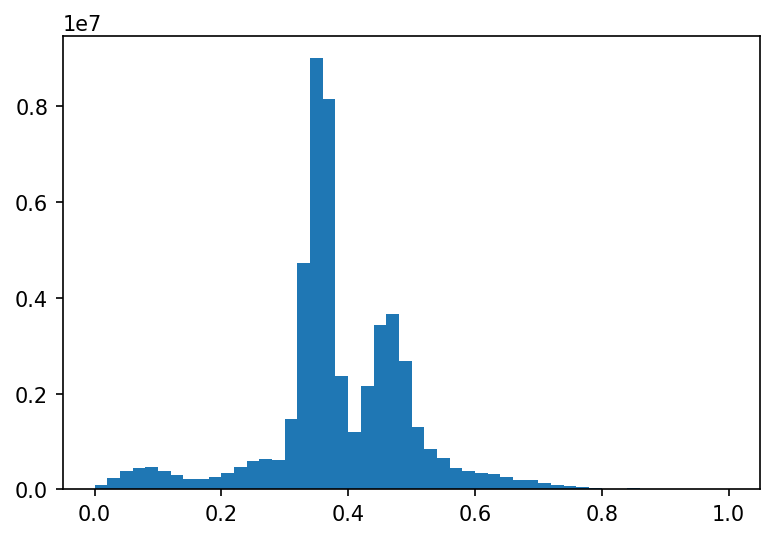

In [32]:
plt.hist(result, 50, range=(0,1));

In [36]:
idl[0:10]

[(254231, 484309),
 (254231, 196497),
 (254231, 609985),
 (254231, 285421),
 (254231, 4439),
 (254231, 24471),
 (254231, 411729),
 (254231, 241315),
 (254231, 399795),
 (254231, 377109)]

In [37]:
uniflna_HA_sub4_JDresults = pd.DataFrame({'IDs':idl,
                                          'Jdist':result})

In [38]:
uniflna_HA_sub4_JDresults.head(10)

,IDs,Jdist
0,"(254231, 484309)",0.373576
1,"(254231, 196497)",0.468940
2,"(254231, 609985)",0.226131
3,"(254231, 285421)",0.050070
4,"(254231, 4439)",0.472727
5,"(254231, 24471)",0.490931
6,"(254231, 411729)",0.386468
7,"(254231, 241315)",0.446886
8,"(254231, 399795)",0.341492
9,"(254231, 377109)",0.360731


In [39]:
uniflna_HA_sub4_JDresults.to_pickle('uniflna_HA_sub4_JDresults.pkl')

In [40]:
uniflna_HA_sub5 = uniflna_HA.sample(n=25000)

In [41]:
# map version
current_file = uniflna_HA_sub5

def JDmfi(id_tup):
    k = 5
    a = charkgram(current_file.loc[[id_tup[0]]].sequences.values[0], k)
    b = charkgram(current_file.loc[[id_tup[1]]].sequences.values[0], k)
    return(JacDist(a,b))


idl=list(it.combinations(list(current_file.index),2))
print(len(idl))

if __name__ == "__main__":
    t1=time.time()
    p = multiprocessing.Pool(processes=30)
    result = p.map(JDmfi, idl)
    #print(result)
    p.close()
    p.join()
    
    print("Pool took:",time.time()-t1)

312487500
Pool took: 38847.25140309334


In [44]:
uniflna_HA_sub5_JDresults = pd.DataFrame({'IDs':idl,
                                          'Jdist':result})


In [45]:
uniflna_HA_sub5_JDresults.head(10)

,IDs,Jdist
0,"(378619, 36153)",0.352129
1,"(378619, 543019)",0.348677
2,"(378619, 387870)",0.353617
3,"(378619, 469231)",0.336374
4,"(378619, 65200)",0.453333
5,"(378619, 212278)",0.354386
6,"(378619, 640569)",0.334495
7,"(378619, 650508)",0.344548
8,"(378619, 55747)",0.586028
9,"(378619, 65376)",0.445388


In [46]:
uniflna_HA_sub5_JDresults.to_pickle('uniflna_HA_sub5_JDresults.pkl')